# IN THIS NOTEBOOK I WILL PERFORM  UNIVARIATE TIME SERIES ANALYSIS USING THE ARIMA, ARMA AND SARIMA MODELS AND FIND OUT WHICH MODEL IS BEST.

In [11]:
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [13]:
#IMPORTING THE DATE COLUMN AS A COLUMN OF DATATYPE 'DATE'
dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
data=pd.read_csv('MAster_methanol.csv',parse_dates=['Date'],date_parser=dateparse,usecols=['Date','Asia Price'])

<ipython-input-13-f2aa5b9b5751>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


In [14]:
#Displays the top 5 rows
data.head()

,Date,Asia Price
0,2005-10-07,232.5
1,2005-10-14,232.5
2,2005-10-21,235.0
3,2005-10-28,232.5
4,2005-11-04,242.5


In [15]:
#Displays the data types
data.dtypes

Date          datetime64[ns]
Asia Price           float64
dtype: object

In [16]:
#Converting Date column to index
data.index=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [17]:
data.head()

,Date,Asia Price
Date,,
2005-10-07,2005-10-07,232.5
2005-10-14,2005-10-14,232.5
2005-10-21,2005-10-21,235.0
2005-10-28,2005-10-28,232.5
2005-11-04,2005-11-04,242.5


In [18]:
data.index

DatetimeIndex(['2005-10-07', '2005-10-14', '2005-10-21', '2005-10-28',
               '2005-11-04', '2005-11-11', '2005-11-18', '2005-11-25',
               '2005-12-02', '2005-12-09',
               ...
               '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12',
               '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09',
               '2021-04-16', '2021-04-23'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

In [19]:
del data['Date']

In [20]:
data

,Asia Price
Date,
2005-10-07,232.5
2005-10-14,232.5
2005-10-21,235.0
2005-10-28,232.5
2005-11-04,242.5
...,...
2021-03-26,370.0
2021-04-02,365.0
2021-04-09,364.0


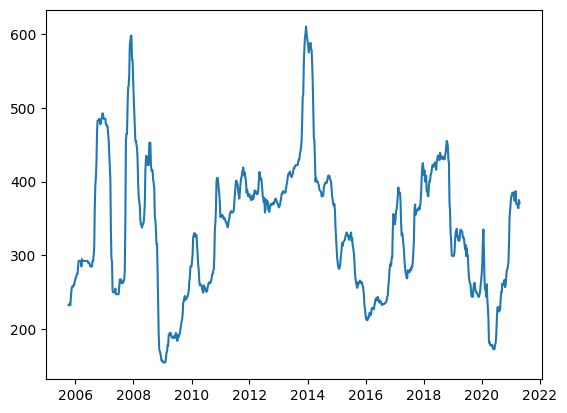

In [21]:
#Plotting the graph for Asia price
plt.plot(data.index, data['Asia Price'] )

STATIONARITY

In [22]:
#CALCULATING THE TRENS,SEASONALITY AND RESIDUALS
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data,period=1)

In [23]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

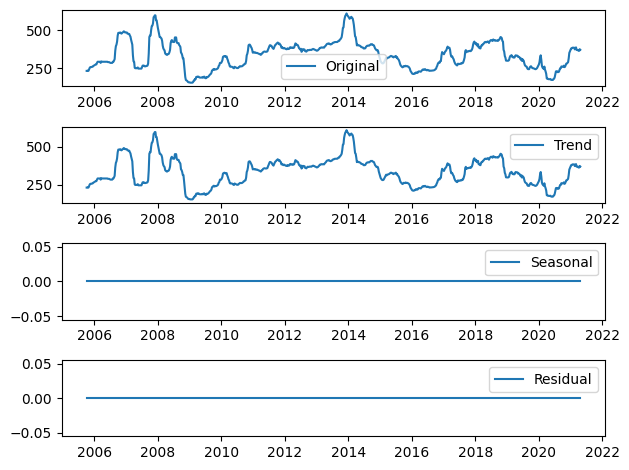

In [24]:
plt.subplot(411)
plt.plot(data,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

THE ABOVE GRAPHS CONCLUDES THAT THE DATA HAS ONLY TREND,NO SEASONALITY

USING THE DICKEY ADFULLER TEST

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adftest=adfuller(data)
print("p-value:",adftest[1])

p-value: 0.0004817851552404464


In [27]:
#Splitting the data int training and testing
train=data[data.index<pd.to_datetime("01-11-2018",format='%d-%m-%Y')]
test=data[data.index>pd.to_datetime("01-11-2018",format='%d-%m-%Y')]

len(train)

670

In [28]:
print(train)

            Asia Price
Date                  
2005-10-07       232.5
2005-10-14       232.5
2005-10-21       235.0
2005-10-28       232.5
2005-11-04       242.5
...                ...
2018-09-28       436.0
2018-10-05       438.0
2018-10-12       446.0
2018-10-19       455.0
2018-10-26       453.0

[670 rows x 1 columns]


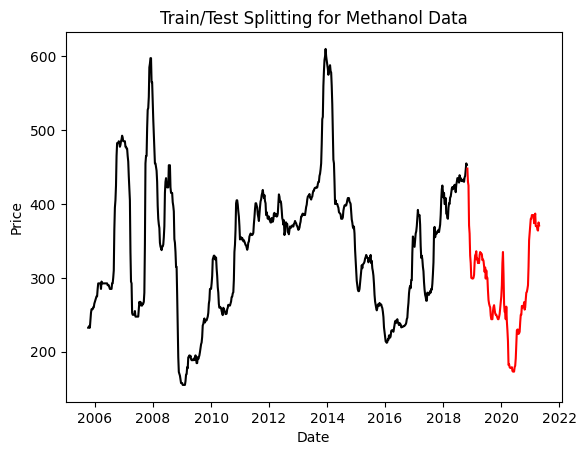

In [29]:
#Plotting the train and test data
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train/Test Splitting for Methanol Data')
plt.show()

CALCULATING p,q VALUES FROM ACF AND PACF PLOTS

In [30]:
#ACF AND PACF PLOTS
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

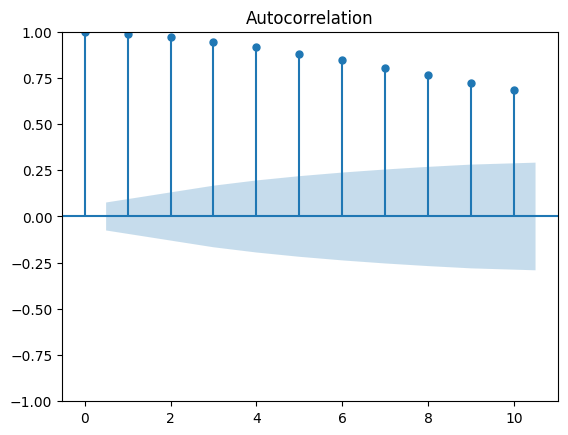

In [31]:
acf_plot=plot_acf(train,lags=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


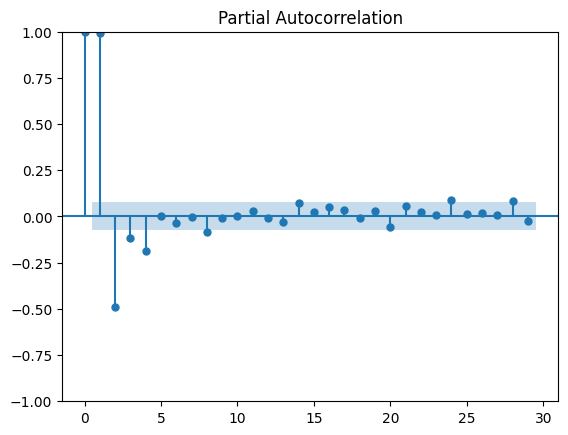

In [32]:
pacf_plot=plot_pacf(train)

The p value from the PACF function is 1

The q value from the ACF function is 1

# **ARIMA MODEL (AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE)**

In [33]:
#ARIMA(train,order=(p,d,q))
#d(diffrentiation) is always 0 for ARIMA  as there is no Seasonal Correction
ARIMAmodel = ARIMA(train, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()
#PREDICTING USING ARIMA MODEL
pred_arima=ARIMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arima.index=test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [34]:
pred_arima.head()

Date
2018-11-02    450.035483
2018-11-09    448.604299
2018-11-16    447.192314
2018-11-23    445.799270
2018-11-30    444.424913
Name: predicted_mean, dtype: float64

([<matplotlib.axis.XTick at 0x7fd1984c28c0>,
 [Text(17866.0, 0, '2018-12-01'),
  Text(18293.0, 0, '2020-02-01'),
  Text(18718.0, 0, '2021-04-01')])

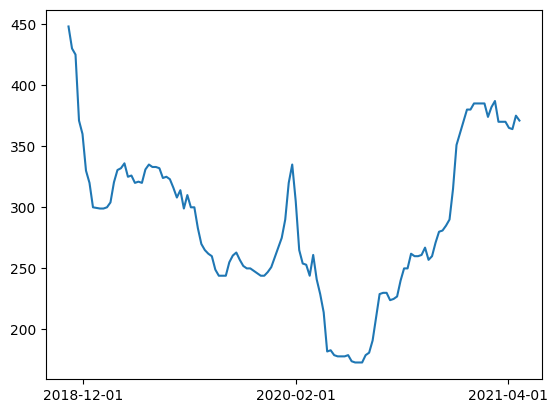

In [35]:
plt.plot(test)
plt.xticks(['2018-12', '2020-02', '2021-04'])

CALCULATING RMSE (ROOT MEAN-SQUARE ERROR)

In [36]:
from sklearn.metrics import mean_squared_error
error_arima=np.sqrt(mean_squared_error(test,pred_arima))
error_arima

125.18783992661128

In [37]:
type(data)

pandas.core.frame.DataFrame

In [38]:
test.mean(),np.sqrt(test.var())

(Asia Price    285.535714
 dtype: float64,
 Asia Price    63.005244
 dtype: float64)

In [39]:
test['Asia Price']

Date
2018-11-02    448.0
2018-11-09    430.0
2018-11-16    425.0
2018-11-23    371.0
2018-11-30    360.0
              ...  
2021-03-26    370.0
2021-04-02    365.0
2021-04-09    364.0
2021-04-16    375.0
2021-04-23    371.0
Name: Asia Price, Length: 126, dtype: float64

In [40]:
df = pd.DataFrame({'Actual Values':test['Asia Price'],'Forecast Price':pred_arima})

In [41]:
type(test)

pandas.core.frame.DataFrame

In [42]:
type(pred_arima)

pandas.core.series.Series

In [43]:
pred_arima

Date
2018-11-02    450.035483
2018-11-09    448.604299
2018-11-16    447.192314
2018-11-23    445.799270
2018-11-30    444.424913
                 ...    
2021-03-26    364.163614
2021-04-02    363.884363
2021-04-09    363.608858
2021-04-16    363.337049
2021-04-23    363.068886
Name: predicted_mean, Length: 126, dtype: float64

THE DATAFRAME CONSISTING OF ACTUAL PRICE AND PREDICTED VALUES OF ASIA'S PRICE

In [44]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,448.0,450.035483
2018-11-09,430.0,448.604299
2018-11-16,425.0,447.192314
2018-11-23,371.0,445.799270
2018-11-30,360.0,444.424913
...,...,...
2021-03-26,370.0,364.163614
2021-04-02,365.0,363.884363
2021-04-09,364.0,363.608858


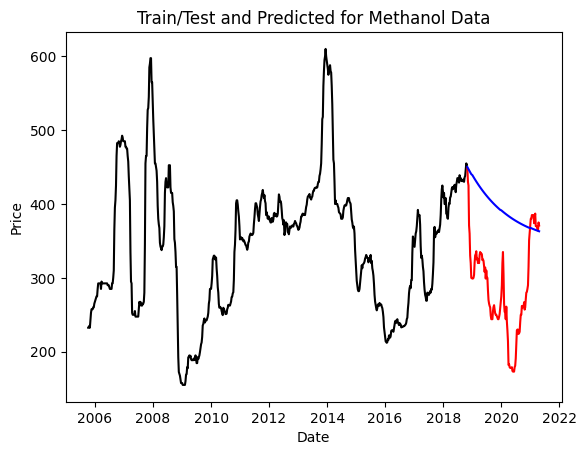

In [45]:
#Plotting the train, test and predicted data
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.plot(pred_arima,color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

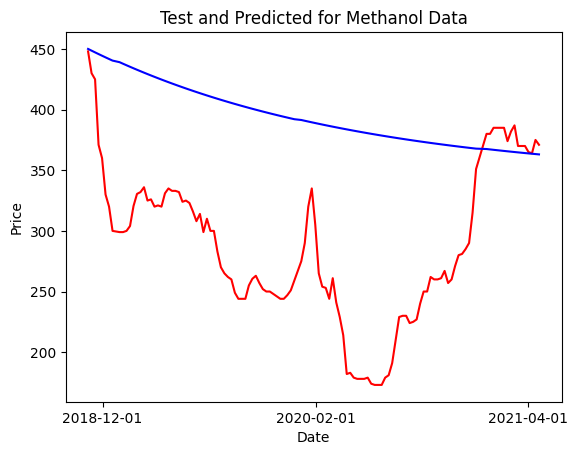

In [46]:
#Plotting the test and predicted data
plt.plot(test,color='red')
plt.plot(pred_arima,color='blue')
plt.xlabel('Date')
plt.xticks(['2018-12', '2020-02', '2021-04'])
plt.ylabel('Price')
plt.title('Test and Predicted for Methanol Data')
plt.show()

# **ARMA (AUTO-REGRESSIVE MOVING AVERAGE)**

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
k = train['Asia Price']

In [49]:
ARMAmodel = SARIMAX(k, order = (1, 0, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
#Making Predictions using ARMA model
ARMAmodel = ARMAmodel.fit()
pred_arma=ARMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arma.index=test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [51]:
pred_arma.head()

Date
2018-11-02    451.024372
2018-11-09    450.996732
2018-11-16    450.969093
2018-11-23    450.941457
2018-11-30    450.913822
Name: predicted_mean, dtype: float64

In [52]:
#Calculation the RMSE
from sklearn.metrics import mean_squared_error
error_arma=np.sqrt(mean_squared_error(test,pred_arma))
error_arma

175.3384129053413

In [53]:
#Comparing the actual and forecasted/predicted price
df = pd.DataFrame({'Actual Values':test['Asia Price'],'Forecast Price':pred_arma})

In [54]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,448.0,451.024372
2018-11-09,430.0,450.996732
2018-11-16,425.0,450.969093
2018-11-23,371.0,450.941457
2018-11-30,360.0,450.913822
...,...,...
2021-03-26,370.0,447.692187
2021-04-02,365.0,447.664751
2021-04-09,364.0,447.637317


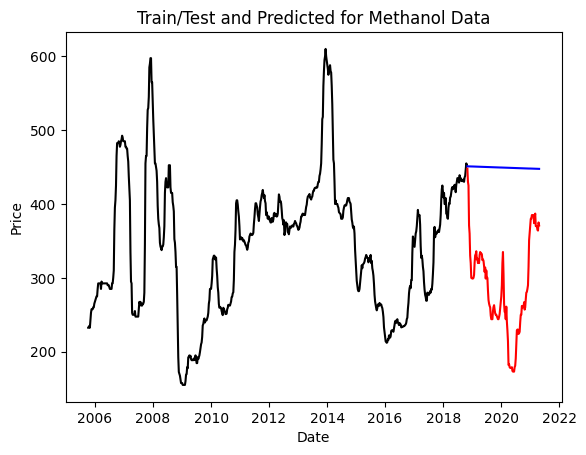

In [55]:
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.plot(pred_arma,color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

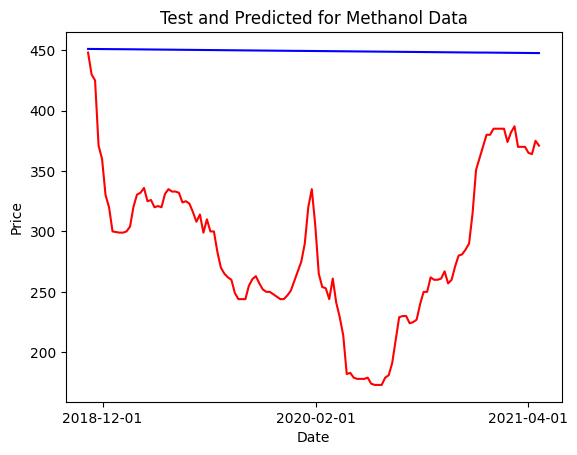

In [56]:
#Plotting the test and predicted data
plt.plot(test,color='red')
plt.plot(pred_arma,color='blue')
plt.xlabel('Date')
plt.xticks(['2018-12', '2020-02', '2021-04'])
plt.ylabel('Price')
plt.title('Test and Predicted for Methanol Data')
plt.show()

CHECKING FOR SEASONALITY BEFORE IMPLEMENTING SARIMA MODEL

In [57]:
rollmean=data.rolling(window=4).mean()
rollstd=data.rolling(window=4).std()

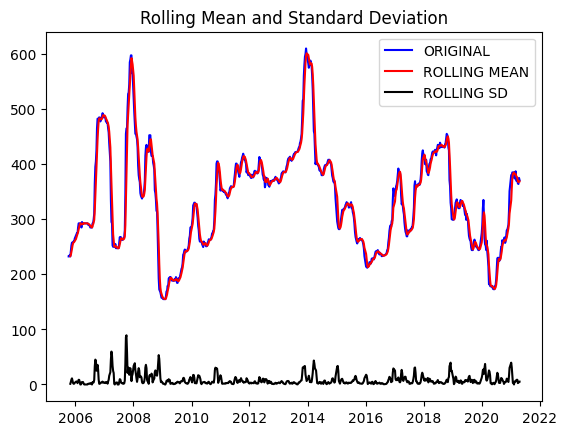

In [58]:
original=plt.plot(data,color='blue',label='ORIGINAL')
mean=plt.plot(rollmean,color='red',label='ROLLING MEAN')
std=plt.plot(rollstd,color='black',label='ROLLING SD') #SD = STANDARD DEVIATION
plt.legend(loc='best') # LOCATION OF THE LEGEND
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

# **SARIMA (SEASONAL AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE)**

In [59]:
import statsmodels.api as sm
sarima_model=sm.tsa.statespace.SARIMAX(train,order=(1,2,1),seasonal_order=(1,2,1,12),enforce_stationary=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
#Predicted using SARIMA model
pred_sarima=sarima_model.predict(start=len(train),end=(len(data)-1))
pred_sarima.index=test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
pred_sarima.head()

Date
2018-11-02    454.466883
2018-11-09    452.937440
2018-11-16    453.032567
2018-11-23    449.084375
2018-11-30    453.528271
Name: predicted_mean, dtype: float64

In [62]:
df = pd.DataFrame({'Actual Values':test['Asia Price'],'Forecast Price':pred_sarima})

In [63]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,448.0,454.466883
2018-11-09,430.0,452.937440
2018-11-16,425.0,453.032567
2018-11-23,371.0,449.084375
2018-11-30,360.0,453.528271
...,...,...
2021-03-26,370.0,755.702375
2021-04-02,365.0,758.440760
2021-04-09,364.0,756.686547


In [64]:
#Calculating RMSE
from sklearn.metrics import mean_squared_error
error_sarima=np.sqrt(mean_squared_error(test,pred_sarima))
error_sarima

322.0675022344499

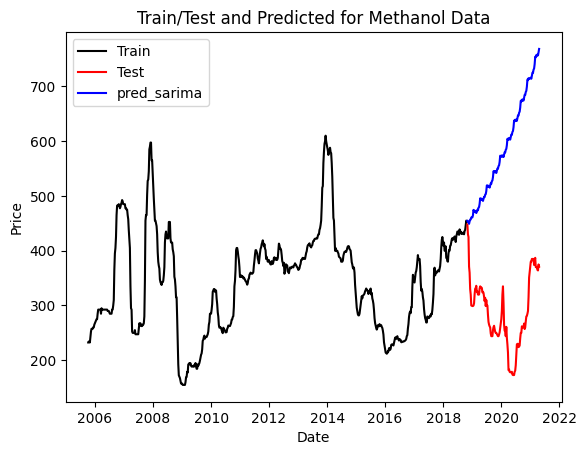

In [65]:
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_sarima,label='pred_sarima',color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

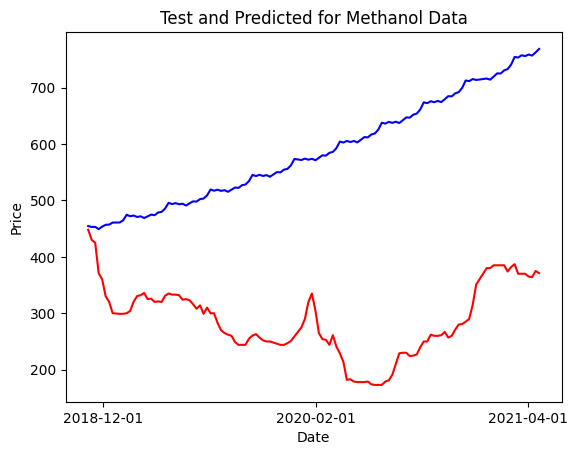

In [66]:
#Plotting the test and predicted data
plt.plot(test,color='red')
plt.plot(pred_sarima,label='pred_sarima',color='blue')
plt.xlabel('Date')
plt.xticks(['2018-12', '2020-02', '2021-04'])
plt.ylabel('Price')
plt.title('Test and Predicted for Methanol Data')
plt.show()

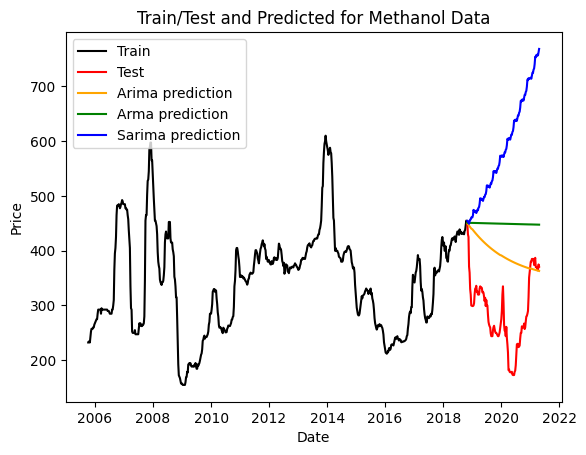

In [67]:
#Plotting all three models
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_arima,label='Arima prediction',color='orange')
plt.plot(pred_arma,label='Arma prediction',color='green')
plt.plot(pred_sarima,label='Sarima prediction',color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

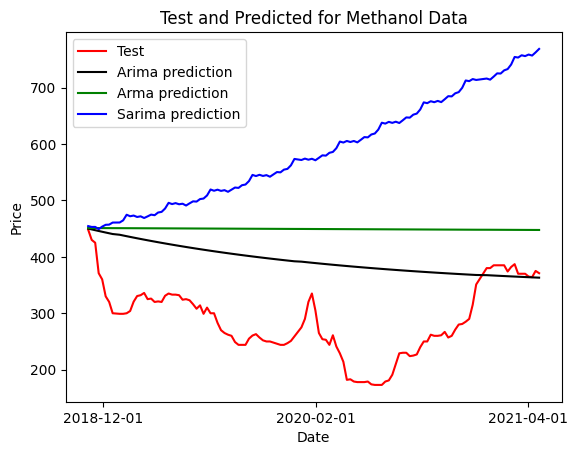

In [68]:
#Plotting all three models
plt.plot(test,label='Test',color='red')
plt.plot(pred_arima,label='Arima prediction',color='black')
plt.plot(pred_arma,label='Arma prediction',color='green')
plt.plot(pred_sarima,label='Sarima prediction',color='blue')
plt.legend()
plt.xlabel('Date')
plt.xticks(['2018-12', '2020-02', '2021-04'])
plt.ylabel('Price')
plt.title('Test and Predicted for Methanol Data')
plt.show()

TO CHECK WHICH WOULD BE THE BEST MODEL TO FORECAST VALUES OF THE ABOVE DATASET, WE USE THE RMSE (ROOT MEAN SQUARE ERROR)

In [69]:
print(error_arima)

125.18783992661128


In [70]:
print(error_arma)

175.3384129053413


In [71]:
print(error_sarima)

322.0675022344499


In [73]:
# Calculate range of test set
range_test = test.max() - test.min()

# Calculate Normalized RMSE
normalized_rmse = error_arima / range_test

print(normalized_rmse)

Asia Price    0.455229
dtype: float64


In [74]:
# Calculate range of test set
range_test = test.max() - test.min()

# Calculate Normalized RMSE
normalized_rmse = error_arma / range_test

print(normalized_rmse)

Asia Price    0.637594
dtype: float64


In [75]:
# Calculate range of test set
range_test = test.max() - test.min()

# Calculate Normalized RMSE
normalized_rmse = error_sarima / range_test

print(normalized_rmse)

Asia Price    1.171155
dtype: float64


ARIMA---> 0.455229

ARMA----> 0.637594

SARIMA--> 1.171155

FROM THE ABOVE, WE CAN COONCLUDE THE ARIMA WOULD BE A GOOD SUITED MODEL FOR THIS FORECASTING AMONG THE THREE